# Chapter 11: Blocks World
### Qiskit 2.x

The architecture uses $27$ qubits, $9$ for representation of the state, one for flag and $13$ qubits to represent the $13$ different categories of rules. The path descriptor for the depth search one is represented by three qubits, since the number of maximal  instantiations is six.

In [2]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator, Aer
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_distribution
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import MCXGate

The architecture uses $27$ qubits, $9$ for representation of the state, one for flag and $13$ qubits to represent the $13$ different categories of rules. The path descriptor for the depth search one is represented by three qubits, since the number of maximal  instantiations is six. 

In [3]:
qc = QuantumCircuit(27)
#State Preparation 0-8
# Flag 9
#1st Trace (ten) 10-22 Rule Classes
#1st Path descriptor represented by three qubit
qc.h(23)
qc.h(24)
qc.h(25)
#Preparation of Aux
qc.x(26)
qc.h(26)

The class  small tower and a block on table  appears in six different combinations. We define the BC tower and block A 

In [4]:
def state_tb():
    qc = QuantumCircuit(9)
    #BC tower and block A    
    
    #BLOCK A qubits 0-2
    #Hhight two qubits
    #qc.x(0)
    #qc.x(1)
    #Clear one qubit
    qc.x(2)

    #BLOCK B qubits 3-5
    #Hhight two qubits
    qc.x(3)
    #qc.x(4)
    #Clear one qubit
    qc.x(5)

    #BLOCK C qubits 6-8
    #Hhight two qubits
    #qc.x(6)
    #qc.x(7)
    #Clear one qubit
    #qc.x(8)

    qc.name="S_TB"
    return qc

The class tower appears in six different combinations. We define the ABC tower

In [5]:
def state_tw():
    qc = QuantumCircuit(9)
    #ABC tower
    
    #BLOCK A qubits 0-2
    #Hhight two qubits
    #qc.x(0)
    qc.x(1)
    #Clear one qubit
    qc.x(2)

    #BLOCK B qubits 3-5
    #Hhight two qubits
    qc.x(3)
    #qc.x(4)
    #Clear one qubit
    #qc.x(5)

    #BLOCK C qubits 6-8
    #Hhight two qubits
    #qc.x(6)
    #qc.x(7)
    #Clear one qubit
    #qc.x(8)
    qc.name="S_TW"
    return qc

The class all blocks on floor has one combination. All blocks on the floor are represented as:

In [6]:
def state_floor():
    qc = QuantumCircuit(9)
    #All Blocks are on floor
    
    #BLOCK A qubits 0-2
    #Hhight two qubits
    #qc.x(0)
    #qc.x(1)
    #Clear one qubit
    qc.x(2)

    #BLOCK B qubits 3-5
    #Hhight two qubits
    #qc.x(3)
    #qc.x(4)
    #Clear one qubit
    qc.x(5)

    #BLOCK C qubits 6-8
    #Hhight two qubits
    #qc.x(6)
    #qc.x(7)
    #Clear one qubit
    qc.x(8)
    qc.name="S_FL"
    return qc

Different  classes of rules are recognized during the $if\_rules()$ function

In [7]:
def if_rules():
    qc = QuantumCircuit(23)
    #Marke the trace indicate the rule group through trace
    gate = MCXGate(3)

    #All blocks on table
    qc.append(gate, [2, 5, 8, 10])
    
    #ABC tower
    qc.append(gate, [1, 2, 3, 11])
    #ACB tower
    qc.append(gate, [1, 2, 6, 12])
    #BAC tower 
    qc.append(gate, [4, 5, 1, 13])
    #BCA tower 
    qc.append(gate, [4, 5, 6, 14])
    #CAB  tower  
    qc.append(gate, [1, 7, 8, 15])
    #CBA tower 
    qc.append(gate, [4, 7, 8, 16])

    
    #BC tower and block A   
    qc.append(gate, [2, 5, 3, 17])
    #BA tower and block C
    qc.append(gate, [8, 5, 3, 18])

    #CA tower and block B
    qc.append(gate, [8, 6, 5, 19])
    #CB tower and block A
    qc.append(gate, [8, 6, 2, 20])

    #AC tower and block B
    qc.append(gate, [0, 2, 5, 21])
    #AB tower and block C
    qc.append(gate, [0, 2, 8, 22])

    qc.name="IF"
    return qc


The class tower like for example $ABC$ tower has just one  instantiation, the class small tower and a block on table (like $BC$ tower and block $A$)  have three 
 instantiations. 
All  blocks on table have six different  instantiations, for each block there are two rules.

In [8]:
def rules_floor():
    qc = QuantumCircuit(26)
    
    #Identify the rule through the descriptor, three are six of them in the WM

    #Rules

    #Search empty state with the descriptor
    
    gate4 = MCXGate(4)
    qc.append(gate4, [10 ,23 ,24 ,25, 9])
    #All blocks on floor

    # Moving A

    #A on B
    qc.cswap(9,0,5)
    #Secod then part with changed descriptor 
    #Reset WM
    qc.append(gate4, [10 ,23 ,24 ,25, 9])
    #Fetch second superposition
    qc.x(23)
    qc.append(gate4, [10 ,23 ,24 ,25, 9])
    #A on C 
    qc.cswap(9,0,8)
    #Reset WM
    qc.append(gate4, [10 ,23 ,24 ,25, 9])
    #Restore descriptor
    qc.x(23)

    # Moving B
    qc.x(24)
    qc.append(gate4, [10 ,23 ,24 ,25, 9])

    # B on A
    qc.cswap(9,2,3)

    #Secod then part with changed descriptor 
    #Reset WM
    qc.append(gate4, [10 ,23 ,24 ,25, 9])
    qc.x(24)
    #Fetch second superposition
    qc.x(23)
    qc.x(24)
    qc.append(gate4, [10 ,23 ,24 ,25, 9])

    #B on C
    qc.cswap(9,3,8)

    #Reset WM
    qc.append(gate4, [10 ,23 ,24 ,25, 9])
    #Restore descriptor
    qc.x(24)
    qc.x(23) 


    # Moving C
    qc.x(25)
    qc.append(gate4, [10 ,23 ,24 ,25, 9])

    #C on A
    qc.cswap(9,6,2)

    #Secod then part with changed descriptor 
    #Reset WM
    qc.append(gate4, [10 ,23 ,24 ,25, 9])
    qc.x(25)
    #Fetch second superposition
    qc.x(25)
    qc.x(23)
    qc.append(gate4, [10 ,23 ,24 ,25, 9])

    # C on B
    qc.cswap(9,6,5)

    #Reset WM
    qc.append(gate4, [10 ,23 ,24 ,25, 9])
    #Restore descriptor
    qc.x(23)
    qc.x(25)

    #We have only six rules, but eight possible paths!!!
    #Additional Filling rules, to get rid of the initial state we will move C agian!!!
  

    # Moving C Again
    qc.x(24)
    qc.x(25)
    qc.append(gate4, [10 ,23 ,24 ,25, 9])

    # A clear goes to high of B
    qc.cswap(9,6,2)

    #Secod then part with changed descriptor 
    #Reset WM
    qc.append(gate4, [10 ,23 ,24 ,25, 9])
    qc.x(25)
    qc.x(24)

    #Fetch second superposition
    qc.x(23)
    qc.x(24)
    qc.x(25)
    qc.append(gate4, [10 ,23 ,24 ,25, 9])

    # C clear goes to high of B
    qc.cswap(9,6,5)

    #Reset WM
    qc.append(gate4, [10 ,23 ,24 ,25, 9])
    #Restore descriptor
    qc.x(25)
    qc.x(24)
    qc.x(23)


    qc.name="R_FL"
    return qc

The class tower (like for example $ABC$ tower) appears in six different combinations. For each combination there is only one instantiation that is represented through all eight states

In [9]:
def rules_tw():
    qc = QuantumCircuit(17)
    #There is a tower
    
    qc.cswap(11,1,5)
    qc.cswap(12,1,8) 

    qc.cswap(13,2,4)
    qc.cswap(14,2,8) 
        
    qc.cswap(15,2,7)
    qc.cswap(16,5,7) 
    

    qc.name="R_TW"
    return qc

There are six combinations of the class small tower and a block on table (like $BC$ tower and block $A$). Each of this combination  has three 
instantiations. Since there are eight possible states represented by the path descriptor for each combination the three instantiations are executed twice with two additional instantiations. 

In [10]:
def rules_tw_bl():
    qc = QuantumCircuit(26)
    gate4 = MCXGate(4)
    #Flag 9
    #Path Descriptor 23, 24, 25
 
    #BC tower and block A   
    #qc.append(gate, [2, 5, 3, 17])
    
    #Put it on Floor
    qc.append(gate4, [17 ,23 ,24 ,25, 9])
    qc.cswap(9,3,8)
    #Clear WM
    qc.append(gate4, [17 ,23 ,24 ,25, 9])

    #Make Tower BCA
    qc.x(23)
    qc.append(gate4, [17 ,23 ,24 ,25, 9])
    qc.cswap(9,5,1)
    #Clear WM
    qc.append(gate4, [17 ,23 ,24 ,25, 9])
    qc.x(23) 

    #Move C on the other block A
    qc.x(24)
    qc.append(gate4, [17 ,23 ,24 ,25, 9])
    qc.cswap(9,2,8)
    #Clear WM
    qc.append(gate4, [17 ,23 ,24 ,25, 9])
    qc.x(24) 

    #Repeat It Again to fill 4-6

    #Put it on Floor
    qc.x(24)
    qc.x(23)
    qc.append(gate4, [17 ,23 ,24 ,25, 9])
    qc.cswap(9,3,8)
    #Clear WM
    qc.append(gate4, [17 ,23 ,24 ,25, 9])
    qc.x(24)
    qc.x(23)

    #Make Tower BCA
    qc.x(25)
    qc.append(gate4, [17 ,23 ,24 ,25, 9])
    qc.cswap(9,5,1)
    #Clear WM
    qc.append(gate4, [17 ,23 ,24 ,25, 9])
    qc.x(25) 

    #Move C on the other block A
    qc.x(25)
    qc.x(23)
    qc.append(gate4, [17 ,23 ,24 ,25, 9])
    qc.cswap(9,2,8)
    #Clear WM
    qc.append(gate4, [17 ,23 ,24 ,25, 9])
    qc.x(25) 
    qc.x(23) 

    #Repeat It Again to fill 7-8

    #Make Tower BCA
    qc.x(25)
    qc.x(24)
    qc.append(gate4, [17 ,23 ,24 ,25, 9])
    qc.cswap(9,5,1)
    #Clear WM
    qc.append(gate4, [17 ,23 ,24 ,25, 9])
    qc.x(25)
    qc.x(24) 

    #Move C on the other block A
    qc.x(25)
    qc.x(24)
    qc.x(23)
    qc.append(gate4, [17 ,23 ,24 ,25, 9])
    qc.cswap(9,2,8)
    #Clear WM
    qc.append(gate4, [17 ,23 ,24 ,25, 9])
    qc.x(25) 
    qc.x(24)
    qc.x(23) 

    #Not Implementdd, but it is done in the same way
    #BA tower and block C
    #qc.append(gate, [8, 5, 3, 18])

    #CA tower and block B
    #qc.append(gate, [8, 6, 5, 19])
    #CB tower and block A
    #qc.append(gate, [8, 6, 2, 20])

    #AC tower and block B
    #qc.append(gate, [0, 2, 5, 21])
    #AB tower and block C
    #qc.append(gate, [0, 2, 8, 22])

    qc.name="R_TB"
    return qc


The goal states $AC$ and  $B$

In [11]:
def oracle():
    qc = QuantumCircuit(27)

    #Specify goal state


    gate = MCXGate(3)
    #AC  B
    qc.append(gate,[3, 5, 8, 26])

    qc.name="O"
    return qc

The inverse functions for un-computing

In [12]:
def if_rules_inv():
    qc=if_rules()
    qc_inv=qc.inverse()
    qc_inv.name="IF†"
    return qc_inv

In [13]:
def rules_floor_inv():
    qc=rules_floor()
    qc_inv=qc.inverse()
    qc_inv.name="R_FL†"
    return qc_inv

In [14]:
def rules_tw_inv():
    qc=rules_tw()
    qc_inv=qc.inverse()
    qc_inv.name="R_TW†"
    return qc_inv

In [15]:
def rules_tw_bl_inv():
    qc=rules_tw_bl()
    qc_inv=qc.inverse()
    qc_inv.name="R_TB†"
    return qc_inv

Grover's amplification

In [16]:
def Grover():
    qc = QuantumCircuit(26)
    #Diffusor

    qc.barrier()
    qc.h([23,24,25])
    qc.x([23,24,25])
    qc.h(23)
    qc.ccx(24,25,23)
    qc.h(23)
    qc.barrier()
    qc.x([23,24,25])
    qc.h([23,24,25])
    
    qc.name="G"
    return qc


In [17]:

qc = QuantumCircuit(27)
#State Preparation 0-8

#Working Memory,  Flag 9

#1St Trace (ten) 10-22 Rule Classes

#1St Descriptor in superposition, one, three, six possible actions represented by three qubit
#Possible instantiations

qc.h(23)
qc.h(24)
qc.h(25)

#Preparation of Aux
qc.x(26)
qc.h(26)

qc.append(state_floor(),range(9))
qc.append(if_rules(),range(23))
qc.append(rules_tw(),range(17))
qc.append(rules_floor(),range(26))
qc.append(rules_tw_bl(),range(26))
qc.append(oracle(),range(27))
qc.append(rules_tw_bl_inv(),range(26))
qc.append(rules_floor_inv(),range(26))
qc.append(rules_tw_inv(),range(17))
qc.append(if_rules_inv(),range(23))
qc.append(state_floor(),range(9))

qc.barrier()

qc.h(26)

qc.barrier()

qc.append(Grover(),range(26))

print("\nCirquit depth:",qc.depth())

qc.draw(fold=150)


Cirquit depth: 13


┌───────┐┌──────┐┌────────┐┌────────┐┌────────┐┌─────┐┌─────────┐┌─────────┐┌─────────┐┌───────┐┌───────┐ ░       ░ ┌─────┐
 q_0: ┤0      ├┤0     ├┤0       ├┤0       ├┤0       ├┤0    ├┤0        ├┤0        ├┤0        ├┤0      ├┤0      ├─░───────░─┤0    ├
      │       ││      ││        ││        ││        ││     ││         ││         ││         ││       ││       │ ░       ░ │     │
 q_1: ┤1      ├┤1     ├┤1       ├┤1       ├┤1       ├┤1    ├┤1        ├┤1        ├┤1        ├┤1      ├┤1      ├─░───────░─┤1    ├
      │       ││      ││        ││        ││        ││     ││         ││         ││         ││       ││       │ ░       ░ │     │
 q_2: ┤2      ├┤2     ├┤2       ├┤2       ├┤2       ├┤2    ├┤2        ├┤2        ├┤2        ├┤2      ├┤2      ├─░───────░─┤2    ├
      │       ││      ││        ││        ││        ││     ││         ││         ││         ││       ││       │ ░       ░ │     │
 q_3: ┤3      ├┤3     ├┤3       ├┤3       ├┤3       ├┤3    ├┤3        ├┤3        ├┤3        ├┤3      ├┤3      ├─░───────░─┤3    ├
      │       ││      ││        ││        ││        ││     ││         ││         ││         ││       ││       │ ░       ░ │     │
 q_4: ┤4 S_FL ├┤4     ├┤4       ├┤4       ├┤4       ├┤4    ├┤4        ├┤4        ├┤4        ├┤4      ├┤4 S_FL ├─░───────░─┤4    ├
      │       ││      ││        ││        ││        ││     ││         ││         ││         ││       ││       │ ░       ░ │     │
 q_5: ┤5      ├┤5     ├┤5       ├┤5       ├┤5       ├┤5    ├┤5        ├┤5        ├┤5        ├┤5      ├┤5      ├─░───────░─┤5    ├
      │       ││      ││        ││        ││        ││     ││         ││         ││         ││       ││       │ ░       ░ │     │
 q_6: ┤6      ├┤6     ├┤6       ├┤6       ├┤6       ├┤6    ├┤6        ├┤6        ├┤6        ├┤6      ├┤6      ├─░───────░─┤6    ├
      │       ││      ││        ││        ││        ││     ││         ││         ││         ││       ││       │ ░       ░ │     │
 q_7: ┤7      ├┤7     ├┤7       ├┤7       ├┤7       ├┤7    ├┤7        ├┤7        ├┤7        ├┤7      ├┤7      ├─░───────░─┤7    ├
      │       ││      ││        ││        ││        ││     ││         ││         ││         ││       ││       │ ░       ░ │     │
 q_8: ┤8      ├┤8     ├┤8  R_TW ├┤8       ├┤8       ├┤8    ├┤8        ├┤8        ├┤8  R_TW† ├┤8      ├┤8      ├─░───────░─┤8    ├
      └───────┘│      ││        ││        ││        ││     ││         ││         ││         ││       │└───────┘ ░       ░ │     │
 q_9: ─────────┤9     ├┤9       ├┤9       ├┤9       ├┤9    ├┤9        ├┤9        ├┤9        ├┤9      ├──────────░───────░─┤9    ├
               │      ││        ││        ││        ││     ││         ││         ││         ││       │          ░       ░ │     │
q_10: ─────────┤10    ├┤10      ├┤10      ├┤10      ├┤10   ├┤10       ├┤10       ├┤10       ├┤10     ├──────────░───────░─┤10   ├
               │      ││        ││        ││        ││     ││         ││         ││         ││       │          ░       ░ │     │
q_11: ─────────┤11 IF ├┤11      ├┤11      ├┤11      ├┤11   ├┤11       ├┤11       ├┤11       ├┤11 IF† ├──────────░───────░─┤11   ├
               │      ││        ││        ││        ││     ││         ││         ││         ││       │          ░       ░ │     │
q_12: ─────────┤12    ├┤12      ├┤12      ├┤12      ├┤12   ├┤12       ├┤12       ├┤12       ├┤12     ├──────────░───────░─┤12   ├
               │      ││        ││   R_FL ││   R_TB ││     ││   R_TB† ││   R_FL† ││         ││       │          ░       ░ │   G │
q_13: ─────────┤13    ├┤13      ├┤13      ├┤13      ├┤13 O ├┤13       ├┤13       ├┤13       ├┤13     ├──────────░───────░─┤13   ├
               │      ││        ││        ││        ││     ││         ││         ││         ││       │          ░       ░ │     │
q_14: ─────────┤14    ├┤14      ├┤14      ├┤14      ├┤14   ├┤14       ├┤14       ├┤14       ├┤14     ├──────────░───────░─┤14   ├
               │      ││        ││        ││        ││     ││         ││         ││         ││       │    


Total count are: {np.str_('100000000000000000000000000'): np.float64(0.03125), np.str_('100100000000000000000000000'): np.float64(0.03125), np.str_('101000000000000000000000000'): np.float64(0.03125), np.str_('101100000000000000000000000'): np.float64(0.03125), np.str_('110000000000000000000000000'): np.float64(0.03125), np.str_('110100000000000000000000000'): np.float64(0.78125), np.str_('111000000000000000000000000'): np.float64(0.03125), np.str_('111100000000000000000000000'): np.float64(0.03125)}


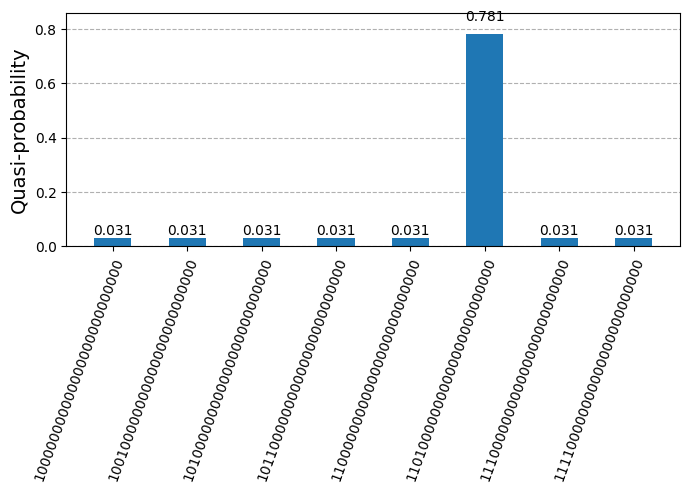

In [18]:
simulator = Aer.get_backend('statevector_simulator')
result=simulator.run(qc.decompose()).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_distribution(counts)

One marked state results in a solution  after one iteration indicated for the initial state all blocks on the floor and the goal states $AC$ and  $B$. The solution is described by the path descriptor by the qubits $23$, $24$ and $25$ with the binary value $101$, the fifth branch. There are 8 branches described by 8 possible transitions $0,1 \cdots  7$

The initial state $BC$ and $A$  and the goal states $AC$ and  $B$

In [19]:
qc = QuantumCircuit(27)
#State Preparation 0-8

#Working Memory,  Flag 9

#1St Trace (ten) 10-22 Rule Classes

#1St Descriptor in superposition, one, three, six possible actions represented by three qubit
#Possible instantiations

qc.h(23)
qc.h(24)
qc.h(25)

#Preparation of Aux
qc.x(26)
qc.h(26)

#qc.append(state_floor(),range(9))
qc.append(state_tb(),range(9))
qc.append(if_rules(),range(23))
qc.append(rules_tw(),range(17))
qc.append(rules_floor(),range(26))
qc.append(rules_tw_bl(),range(26))
qc.append(oracle(),range(27))
qc.append(rules_tw_bl_inv(),range(26))
qc.append(rules_floor_inv(),range(26))
qc.append(rules_tw_inv(),range(17))
qc.append(if_rules_inv(),range(23))
qc.append(state_tb(),range(9))
#qc.append(state_floor(),range(9))

qc.barrier()

qc.h(26)

qc.barrier()

qc.append(Grover(),range(26))

print("\nCirquit depth:",qc.depth())

qc.draw(fold=150)


Cirquit depth: 13


┌───────┐┌──────┐┌────────┐┌────────┐┌────────┐┌─────┐┌─────────┐┌─────────┐┌─────────┐┌───────┐┌───────┐ ░       ░ ┌─────┐
 q_0: ┤0      ├┤0     ├┤0       ├┤0       ├┤0       ├┤0    ├┤0        ├┤0        ├┤0        ├┤0      ├┤0      ├─░───────░─┤0    ├
      │       ││      ││        ││        ││        ││     ││         ││         ││         ││       ││       │ ░       ░ │     │
 q_1: ┤1      ├┤1     ├┤1       ├┤1       ├┤1       ├┤1    ├┤1        ├┤1        ├┤1        ├┤1      ├┤1      ├─░───────░─┤1    ├
      │       ││      ││        ││        ││        ││     ││         ││         ││         ││       ││       │ ░       ░ │     │
 q_2: ┤2      ├┤2     ├┤2       ├┤2       ├┤2       ├┤2    ├┤2        ├┤2        ├┤2        ├┤2      ├┤2      ├─░───────░─┤2    ├
      │       ││      ││        ││        ││        ││     ││         ││         ││         ││       ││       │ ░       ░ │     │
 q_3: ┤3      ├┤3     ├┤3       ├┤3       ├┤3       ├┤3    ├┤3        ├┤3        ├┤3        ├┤3      ├┤3      ├─░───────░─┤3    ├
      │       ││      ││        ││        ││        ││     ││         ││         ││         ││       ││       │ ░       ░ │     │
 q_4: ┤4 S_TB ├┤4     ├┤4       ├┤4       ├┤4       ├┤4    ├┤4        ├┤4        ├┤4        ├┤4      ├┤4 S_TB ├─░───────░─┤4    ├
      │       ││      ││        ││        ││        ││     ││         ││         ││         ││       ││       │ ░       ░ │     │
 q_5: ┤5      ├┤5     ├┤5       ├┤5       ├┤5       ├┤5    ├┤5        ├┤5        ├┤5        ├┤5      ├┤5      ├─░───────░─┤5    ├
      │       ││      ││        ││        ││        ││     ││         ││         ││         ││       ││       │ ░       ░ │     │
 q_6: ┤6      ├┤6     ├┤6       ├┤6       ├┤6       ├┤6    ├┤6        ├┤6        ├┤6        ├┤6      ├┤6      ├─░───────░─┤6    ├
      │       ││      ││        ││        ││        ││     ││         ││         ││         ││       ││       │ ░       ░ │     │
 q_7: ┤7      ├┤7     ├┤7       ├┤7       ├┤7       ├┤7    ├┤7        ├┤7        ├┤7        ├┤7      ├┤7      ├─░───────░─┤7    ├
      │       ││      ││        ││        ││        ││     ││         ││         ││         ││       ││       │ ░       ░ │     │
 q_8: ┤8      ├┤8     ├┤8  R_TW ├┤8       ├┤8       ├┤8    ├┤8        ├┤8        ├┤8  R_TW† ├┤8      ├┤8      ├─░───────░─┤8    ├
      └───────┘│      ││        ││        ││        ││     ││         ││         ││         ││       │└───────┘ ░       ░ │     │
 q_9: ─────────┤9     ├┤9       ├┤9       ├┤9       ├┤9    ├┤9        ├┤9        ├┤9        ├┤9      ├──────────░───────░─┤9    ├
               │      ││        ││        ││        ││     ││         ││         ││         ││       │          ░       ░ │     │
q_10: ─────────┤10    ├┤10      ├┤10      ├┤10      ├┤10   ├┤10       ├┤10       ├┤10       ├┤10     ├──────────░───────░─┤10   ├
               │      ││        ││        ││        ││     ││         ││         ││         ││       │          ░       ░ │     │
q_11: ─────────┤11 IF ├┤11      ├┤11      ├┤11      ├┤11   ├┤11       ├┤11       ├┤11       ├┤11 IF† ├──────────░───────░─┤11   ├
               │      ││        ││        ││        ││     ││         ││         ││         ││       │          ░       ░ │     │
q_12: ─────────┤12    ├┤12      ├┤12      ├┤12      ├┤12   ├┤12       ├┤12       ├┤12       ├┤12     ├──────────░───────░─┤12   ├
               │      ││        ││   R_FL ││   R_TB ││     ││   R_TB† ││   R_FL† ││         ││       │          ░       ░ │   G │
q_13: ─────────┤13    ├┤13      ├┤13      ├┤13      ├┤13 O ├┤13       ├┤13       ├┤13       ├┤13     ├──────────░───────░─┤13   ├
               │      ││        ││        ││        ││     ││         ││         ││         ││       │          ░       ░ │     │
q_14: ─────────┤14    ├┤14      ├┤14      ├┤14      ├┤14   ├┤14       ├┤14       ├┤14       ├┤14     ├──────────░───────░─┤14   ├
               │      ││        ││        ││        ││     ││         ││         ││         ││       │    


Total count are: {np.str_('100000000000000000000000000'): np.float64(0.28125), np.str_('100100000000000000000000000'): np.float64(0.03125), np.str_('101000000000000000000000000'): np.float64(0.28125), np.str_('101100000000000000000000000'): np.float64(0.03125), np.str_('110000000000000000000000000'): np.float64(0.03125), np.str_('110100000000000000000000000'): np.float64(0.28125), np.str_('111000000000000000000000000'): np.float64(0.03125), np.str_('111100000000000000000000000'): np.float64(0.03125)}


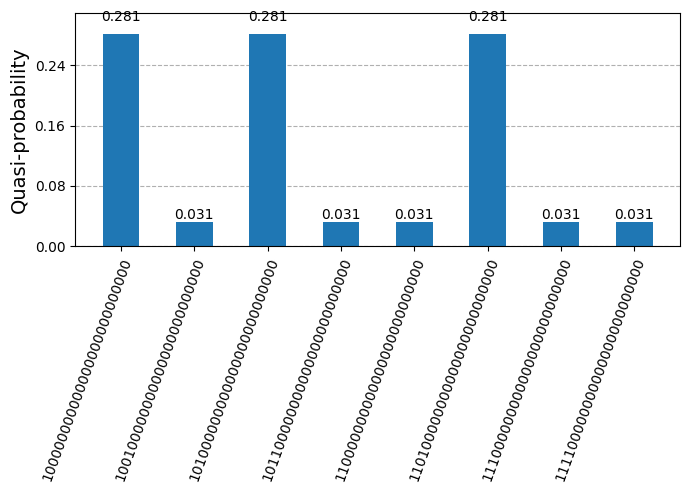

In [20]:
simulator = Aer.get_backend('statevector_simulator')
result=simulator.run(qc.decompose()).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_distribution(counts)

Three marked states results in a solution  after one iteration indicated for the initial state $BC$ and $A$  and the goal states $AC$ and  $B$, the probabilities of measuring a state using the  $statevector$ $simulator$  